# 第11章 サンプリング法

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import cos, sin, exp, pi
plt.style.use("ggplot")

## 11.1 基本的なサンプリングアルゴリズム

11.1.1 標準的な分布

C:\Users\Asunaro\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  # Remove the CWD from sys.path while we load stuff.


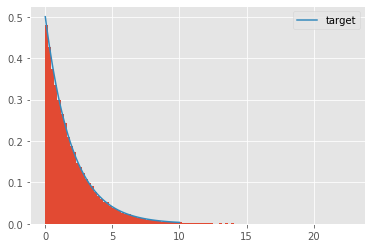

In [2]:
# 逆関数法（指数分布）

N_sample = 100000
lam = 0.5
array = np.linspace(0, 10, 100)
target = lam * exp(- lam * array)

z_uni = np.random.rand(N_sample)
dis = - 1 / lam * np.log(1 - z_uni)
plt.hist(dis, normed=True, bins=100)

plt.plot(array, target, label="target")
plt.legend()

C:\Users\Asunaro\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  # This is added back by InteractiveShellApp.init_path()


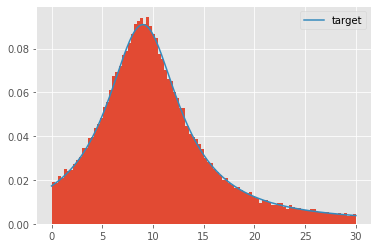

In [3]:
# 逆関数法（コーシー分布）

x0 = 10 - 1
gam = np.sqrt(2*10-1)
array = np.linspace(0, 30, 200)
target = 1 / pi / (1 + ((array - x0)/gam)**2)

z_uni = np.random.rand(N_sample)
dis = gam * np.tan(pi * (z_uni - 0.5)) + x0
dis = dis[(dis>0) & (dis<30)]
plt.hist(dis, normed=True, bins=100)


plt.plot(array, target/3.5, label="target")
plt.legend()


C:\Users\Asunaro\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  from ipykernel import kernelapp as app


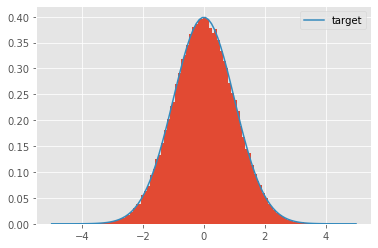

In [4]:
# 逆関数法（Box-Muller法）（正規分布）

array = np.linspace(-5, 5, 100)
target = 1 / np.sqrt(2*pi) * exp(-array**2 / 2)

z1_uni = 2 * np.random.rand(N_sample) - 1
z2_uni = 2 * np.random.rand(N_sample) - 1

z1 = z1_uni[z1_uni**2 + z2_uni**2 < 1]
z2 = z2_uni[z1_uni**2 + z2_uni**2 < 1]

y1 = z1 * (-2 * np.log(z1**2 + z2**2) / (z1**2 + z2**2))**(1/2)
y2 = z2 * (-2 * np.log(z1**2 + z2**2) / (z1**2 + z2**2))**(1/2)

plt.hist(y1, normed=True, bins=100)
plt.plot(array, target, label="target")
plt.legend()

11.1.2 棄却サンプリング

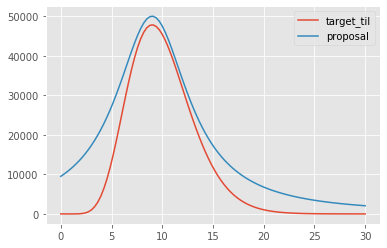

In [5]:
# ガンマ分布
from scipy.stats import gamma

a = 10
b = 1
x0 = a - 1
gam = np.sqrt(2*a - 1)
array = np.linspace(0, 30, 100)
target_til = lambda z: z**(a-1) * exp(- b * z)
proposal = lambda z: 5e4 / (1 + (z - x0)**2/(gam**2))

plt.plot(array, target_til(array), label="target_til")
plt.plot(array, proposal(array), label="proposal")
plt.legend()

C:\Users\Asunaro\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in exp
  if __name__ == '__main__':
C:\Users\Asunaro\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in multiply
  if __name__ == '__main__':
C:\Users\Asunaro\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


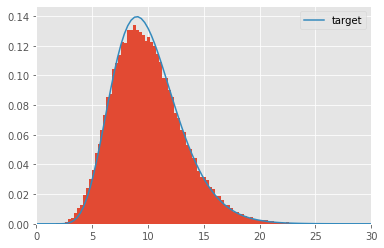

In [6]:
z_uni = np.random.rand(N_sample)
z_proposal = gam * np.tan(pi * (z_uni - 0.5)) + x0

u = proposal(z_proposal) * np.random.rand(N_sample)

samples = z_proposal[target_til(z_proposal) > u]

plt.hist(samples, normed=True, bins=100)
plt.plot(array, gamma.pdf(array, a-1, b), label="target")
plt.xlim(0, 30)
plt.legend()

11.1.4 重点サンプリング

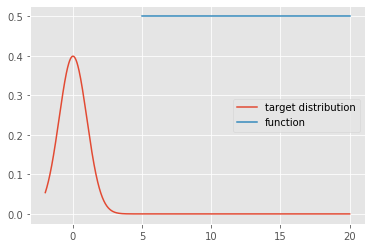

In [7]:
# 通常のモンテカルロ法では効率的にサンプルできない

from scipy.stats import norm
from time import time
mu = 0
sigma = 1
array = np.linspace(-2, 20, 1000)
dis = norm(mu, sigma).pdf
func = 0.5 * np.ones_like(array[array>5])
plt.plot(array, dis(array), label="target distribution")
plt.plot(array[array>5], func, label="function")
plt.legend()

In [8]:
t = time()
N_sample = int(1e7)
samples = np.random.normal(mu, sigma, N_sample)
expectation = np.mean(dis(samples[samples>5]) * 0.5)
print(expectation)
time() - t

3.2983378315021324e-07


0.4260067939758301

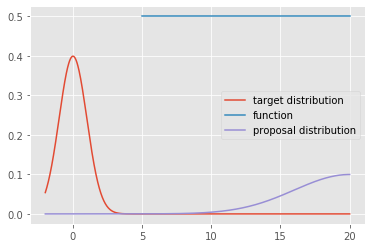

In [9]:
# 重点サンプリング

mu_prop = 20
sigma_prop = 4
proposal = norm(mu_prop, sigma_prop).pdf
plt.plot(array, dis(array), label="target distribution")
plt.plot(array[array>5], func, label="function")
plt.plot(array, proposal(array), label="proposal distribution")
plt.legend()

In [10]:
t = time()
N_sample = 10000
samples = np.random.normal(mu_prop, sigma_prop, N_sample)
expectation = np.mean(dis(samples[samples>5]) / proposal(samples[samples>5]) * 0.5)
print(expectation)
time() - t

1.689566008263566e-07


0.023084640502929688

In [11]:
# SIR

mu_prop = 20
sigma_prop = 4
t = time()
N_sample = 100000
samples_prop = np.random.normal(mu_prop, sigma_prop, N_sample)
weight = (dis(samples_prop)/proposal(samples_prop)) / np.sum(dis(samples_prop)/proposal(samples_prop))
samples = np.random.choice(samples_prop, N_sample , p=weight)
expectation = np.mean(dis(samples[samples>5]) * 0.5)
print(expectation)
time() - t

4.7553682507422434e-07


0.07194352149963379

## 11.2 マルコフ連鎖モンテカルロ

11.2.2 Metropolis-Hastingsアルゴリズム

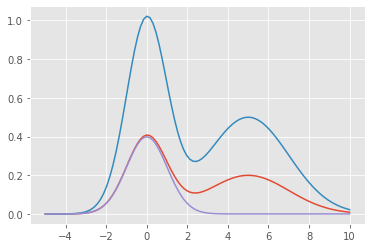

In [12]:
mu = np.array([0, 5])
sigma = np.array([1, 2])
mu_prop = 0
sigma_prop = 1
array = np.linspace(-5, 10, 100)
target = lambda x: norm(mu[0], sigma[0]).pdf(x) + norm(mu[1], sigma[1]).pdf(x)
target_til = lambda x: exp(-(x-mu[0])**2/(2*sigma[0]**2)) / sigma[0] + exp(-(x-mu[1])**2/(2*sigma[1]**2)) / sigma[1]
proposal = norm(mu_prop, sigma_prop).pdf

plt.plot(array, target(array))
plt.plot(array, target_til(array))
plt.plot(array, proposal(array))

0.94306


C:\Users\Asunaro\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  app.launch_new_instance()


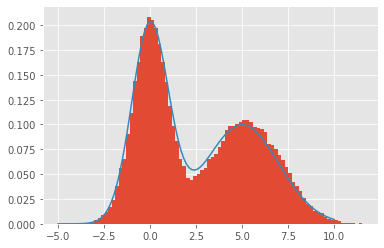

In [13]:
N_epoch = 100000
sample = 0
m = 0.3
samples = []
accept = 0
for i in range(N_epoch):
    new_sample = sample + m * np.random.normal(mu_prop, sigma_prop)
    r = target_til(new_sample)/target_til(sample)
    if min(1, r) > np.random.rand():
        sample = new_sample
        accept += 1
    samples.append(sample)
samples = np.array(samples)

print(accept/N_epoch)
plt.hist(samples, bins=80, normed=True)
plt.plot(array, target(array)/2)

## 11.3 ギブスサンプリング

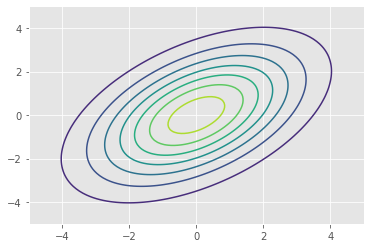

In [14]:
from scipy.stats import multivariate_normal

mu = np.array([0, 0])
sigma = np.array([[4, 2],
                  [2, 4]])
x_array = np.linspace(-5, 5, 100)
y_array = np.linspace(-5, 5, 100)
X_array, Y_array = np.meshgrid(x_array, y_array)
data = np.dstack((X_array, Y_array))

target = multivariate_normal(mu, sigma).pdf
plt.contour(X_array, Y_array, target(data))

$p(x_1, x_2)=\frac{1}{2\pi\sigma_1\sigma_2\sqrt{1-\rho^2}}\times\exp
\Bigl[{-\frac{1}{2(1-\rho^2)}
\Bigl(\frac{(x_1-\mu_1)^2}{\sigma_1^2}
-2\rho\frac{(x_1-\mu_1)(x_2-\mu_2)}{\sigma_1\sigma_2}
+\frac{(x_2-\mu_2)^2}{\sigma_2^2}\Bigl)}\Bigl]\\\
=A\exp\Bigl[{-\frac{1}{2(1-\rho^2)}
\Bigl(\frac{x_1-\mu_1}{\sigma_1}
-\rho\frac{x_2-\mu_2}{\sigma_2}\Bigl)^2}\Bigl]\\\
=A\exp\Bigl[{-\frac{1}{2(1-\rho^2)}
\Bigl(z_1-\rho z_2\Bigl)^2}\Bigl]$

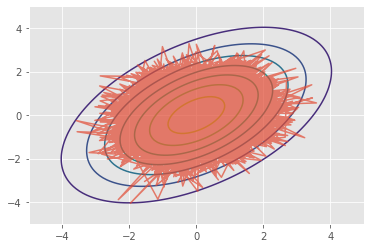

In [15]:
N_sample = 10000
samples = []
sample = np.array([0., 0.])
sigma1 = sigma[0, 0]
sigma2 = sigma[1, 1]
sigma12 = sigma[1, 0]
rho = sigma12 / (sigma1 * sigma2)
sigma_sample = np.sqrt(1-rho**2)
for i in range(N_sample):
    mu_sample = rho * sample[1]
    sample[0] = np.random.normal(mu_sample, sigma_sample, 1)
    mu_sample = rho * sample[0]
    sample[1] = np.random.normal(mu_sample, sigma_sample, 1)
    samples.append(list(sample))
samples = np.array(samples)

samples[0] = mu[0] + sigma1 * samples[0]
samples[1] = mu[1] + sigma2 * samples[1]
plt.plot(samples[2000:, 0], samples[2000:, 1], alpha=0.7)
plt.contour(X_array, Y_array, target(data))

In [16]:
def print_varsize():
    import types
    print("{}{: >15}{}{: >10}{}".format('|','Variable Name','|','  Size','|'))
    print(" -------------------------- ")
    for k, v in globals().items():
        if hasattr(v, 'size') and not k.startswith('_') and not isinstance(v,types.ModuleType):
            print("{}{: >15}{}{: >10}{}".format('|',k,'|',str(v.size),'|'))
        elif hasattr(v, '__len__') and not k.startswith('_') and not isinstance(v,types.ModuleType):
            print("{}{: >15}{}{: >10}{}".format('|',k,'|',str(len(v)),'|'))

print_varsize()

|  Variable Name|      Size|
 -------------------------- 
|             In|        17|
|            Out|        14|
|          array|       100|
|          z_uni|    100000|
|            gam|         1|
|         z1_uni|    100000|
|         z2_uni|    100000|
|             z1|     78723|
|             z2|     78723|
|             y1|     78723|
|             y2|     78723|
|     z_proposal|    100000|
|              u|    100000|
|        samples|     20000|
|             mu|         2|
|          sigma|         4|
|           func|       682|
|    expectation|         1|
|   samples_prop|    100000|
|         weight|    100000|
|         sample|         2|
|              r|         1|
|        x_array|       100|
|        y_array|       100|
|        X_array|     10000|
|        Y_array|     10000|
|           data|     20000|
|         sigma1|         1|
|         sigma2|         1|
|        sigma12|         1|
|            rho|         1|
|   sigma_sample|         1|
|      mu_samp

In [17]:
import gc
del z1, z2, y1, y2, z_uni, z1_uni, z2_uni, X_array, Y_array, samples_prop, weight, data, z_proposal, u, samples
gc.collect()

63

## 11.4 スライスサンプリング

C:\Users\Asunaro\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.


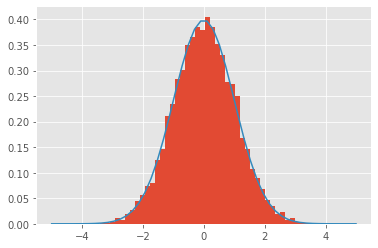

In [18]:
# 正規分布

N_sample = 10000
mu = 0
sigma=1

array = np.linspace(-5, 5)
target = norm(mu, sigma).pdf
sample = 2
samples = []
w = 0.5
for i in range(N_sample):
    slice_right = sample + w
    slice_left = sample - w
    slice = np.random.rand() * target(sample)
    while target(slice_right) > slice:
        slice_right += 0.3
    while target(slice_left) > slice:
        slice_left -= 0.3
    new_sample = (slice_right - slice_left) * np.random.rand() + slice_left
    if (target(new_sample) < slice):
        if new_sample < sample:
            slice_left = new_sample
        else:
            slice_right = new_sample
        new_sample = (slice_right - slice_left) * np.random.rand() + slice_left
    sample = new_sample
    samples.append(sample)
plt.hist(samples, bins=50, normed=True)
plt.plot(array, target(array))